# Importing The Packages and Reading The Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import  metrics
from xgboost import XGBClassifier
from sklearn.svm import SVC
color = sns.color_palette('pastel') + sns.color_palette('dark')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Anomalies_in_Wafer.csv')
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,...,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [ ]:
df.shape

(1763, 1559)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

48

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1715, 1559)

# Checking The Columns Data Types

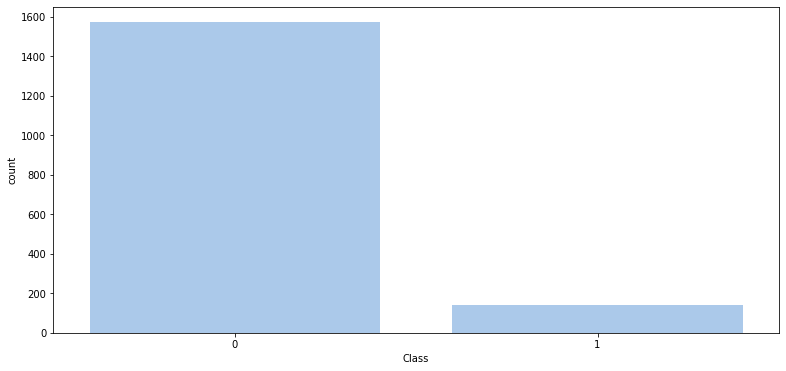

In [ ]:
plt.figure(figsize=(13,6))
sns.countplot(data=df, x='Class', color=color[0]);

In [ ]:
integer = []
for i in df.columns:
    if df[i].dtypes == 'int64':
        integer.append(i)
        
print('Columns with integer data type:', len(integer))

Columns with integer data type: 1558


In [ ]:
Float = []
for i in df.columns:
    if df[i].dtypes == 'float64':
        Float.append(i)
        
print('Columns with float data type:', len(Float))

Columns with float data type: 1


## Conclusion
- #### Nearly all the columns are of integer data type and they must be converted to float.

In [ ]:
df.iloc[:,:-1] = df.iloc[:,:-1].astype(float)

In [ ]:
Float = []
for i in df.columns:
    if df[i].dtypes == 'float64':
        Float.append(i)
        
print('Columns with float data type:', len(Float))

Columns with float data type: 1558


### They have been converted to float.

# Applying TSNE

In [ ]:
df_num = df.drop('Class', axis=1)
df_num.shape

(1715, 1558)

In [ ]:
tsne = TSNE(learning_rate=50)

In [ ]:
tsne_features = tsne.fit_transform(df_num)

In [ ]:
tsne_features[0:3, :]

array([[-26.072445 ,  -4.5133977],
       [ 22.076162 , -36.235546 ],
       [-25.543545 ,  -5.6839395]], dtype=float32)

In [ ]:
df['feature_1'] = tsne_features[:,0]
df['feature_2'] = tsne_features[:,1]

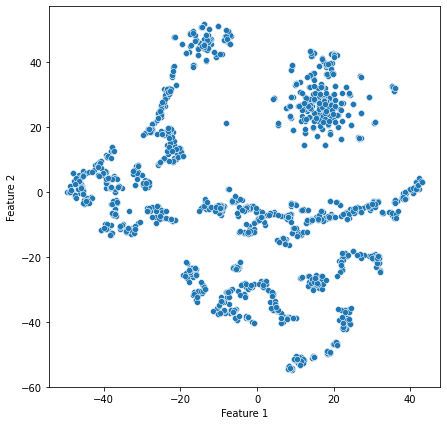

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='feature_1', y='feature_2');
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

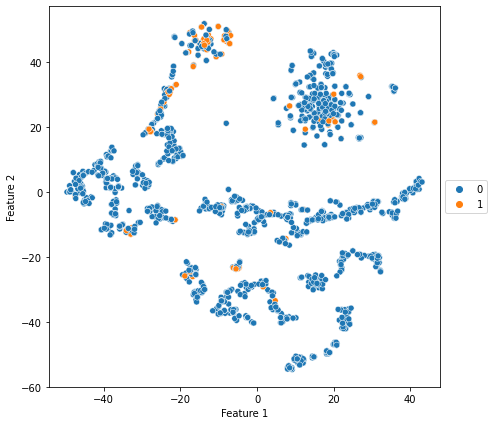

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='feature_1', y='feature_2', hue='Class');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

# Applying PCA to Create The Classification Model

## Creating copy of the data and droping feature 1 & feature 2

In [ ]:
df_2 = df.copy()

In [ ]:
df_2.drop(['feature_1','feature_2'], axis=1, inplace=True)

In [ ]:
df_2.head()

,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,...,feature_1520,feature_1521,feature_1522,feature_1523,feature_1524,feature_1525,feature_1526,feature_1527,feature_1528,feature_1529,feature_1530,feature_1531,feature_1532,feature_1533,feature_1534,feature_1535,feature_1536,feature_1537,feature_1538,feature_1539,feature_1540,feature_1541,feature_1542,feature_1543,feature_1544,feature_1545,feature_1546,feature_1547,feature_1548,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,1.6000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4.1500,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.5151,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,19.5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Splitting the data

In [ ]:
features = df_2.drop('Class', axis=1).values
label = df_2.Class.values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state=30)

## Building the model

In [ ]:
xgb_grid = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5],
            'subsample': [0.6, 0.8],
            'colsample_bytree': [0.6, 0.8],
            'max_depth': [3, 4, 5]
        }

In [ ]:
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=3)),
                 ('classifier', GridSearchCV(estimator= XGBClassifier(), param_grid=xgb_grid, cv = 3, n_jobs=-1,verbose=1))
])

In [ ]:
pipe.fit(x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    9.4s finished


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reducer',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier',
                 GridSearchCV(cv=3, error_score=nan,
                              estimator=XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_b...
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      seed=None, silent=None,
                                                      subsample=1,
 

In [ ]:
pipe.steps[1]

('reducer',
 PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False))

## Model Evaluation

In [ ]:
print('Training Score:', round(pipe.score(x_train, y_train)*100, 2))

Training Score: 95.33


In [ ]:
print('Testing Score:', round(pipe.score(x_test, y_test)*100, 2))

Testing Score: 91.46


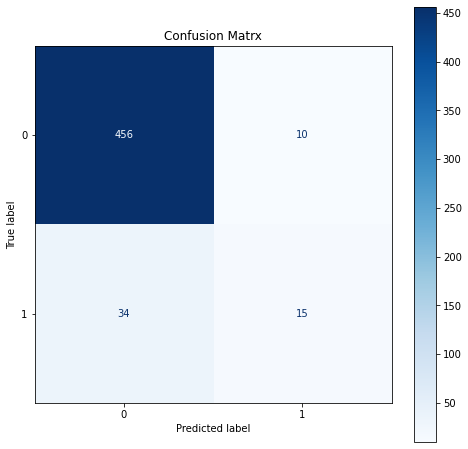

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Confusion Matrx')
chart = metrics.plot_confusion_matrix(pipe, x_test, y_test,  ax = ax, values_format='0.0f', cmap='Blues')
chart.confusion_matrix;

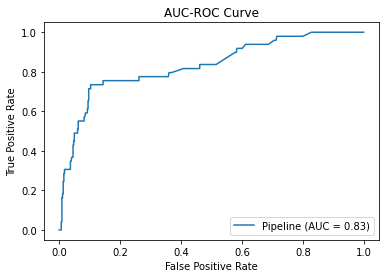

In [ ]:
metrics.plot_roc_curve(pipe, x_test, y_test);
plt.title('AUC-ROC Curve');